Датасет с фильмами: https://grouplens.org/datasets/movielens/

In [19]:
import numpy as np
import pandas as pd
import time

from surprise import Reader, Dataset, SVD, NMF
from surprise.model_selection import train_test_split
from surprise import accuracy

import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
ratings_df = pd.read_csv('./ratings.csv')
print('Количество пользователей: {}'.format(len(ratings_df['userId'].unique())))
print('Количество фильмов: {}'.format(len(ratings_df['movieId'].unique())))
print('Размерность датасета: {}'.format(ratings_df.shape))

ratings_df.head()

Количество пользователей: 610
Количество фильмов: 9724
Размерность датасета: (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# Отберём для тестирования часть набора и отмасштабируем для удобства идентификаторы фильмов так,
# чтобы они начинались с 1 и заканчивались на n_movies:

n = 100000
ratings_df_sample = ratings_df[:n]

n_users = len(ratings_df_sample['userId'].unique())
n_movies = len(ratings_df_sample['movieId'].unique())
(n_users, n_movies)

(610, 9569)

In [28]:
# создание объекта класса Reader
reader = Reader(rating_scale=(1, 5))
# создание объекта класса Dataset
dataset = Dataset.load_from_df(ratings_df_sample[['userId', 'movieId', 'rating']], reader)
# разбиение данных на обучающую и тестовую выборки
trainset, testset = train_test_split(dataset, test_size = 0.1)
# создание экземпляра класса основного алгоритма
model_nmf = NMF()
# обучение модели на обучающей выборке
model_nmf.fit(trainset)
# предсказание рейтингов на тестовой выборке
predictions = model_nmf.test(testset)

# оценка качества модели
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9243
MAE:  0.7105


0.7104780801600724

In [29]:
R_pred_surprise = np.zeros((n_users, n_movies))
for u in range(n_users):
    for m in range(n_movies):
        R_pred_surprise[u][m] = model.predict(u, m).est
        
pd.DataFrame(np.round(R_pred_surprise, 2))

,0,1,2,3,4,5,6,7,8,9,...,9559,9560,9561,9562,9563,9564,9565,9566,9567,9568
0,3.50,3.90,3.52,3.32,3.01,2.98,3.94,3.18,3.22,3.27,...,3.50,3.50,3.50,3.50,3.50,3.50,3.50,3.50,3.50,3.50
1,4.20,4.49,4.04,3.90,3.94,3.65,4.43,3.94,3.94,3.96,...,4.20,4.20,4.20,4.20,4.20,4.20,4.20,4.20,4.20,4.20
2,3.57,3.91,3.75,3.43,3.16,3.06,4.05,3.31,3.18,3.34,...,3.57,3.57,3.57,3.57,3.57,3.57,3.57,3.57,3.57,3.57
3,2.43,2.81,2.48,2.56,2.20,1.84,3.06,2.10,1.91,2.06,...,2.43,2.43,2.43,2.43,2.43,2.43,2.43,2.43,2.43,2.43
4,3.30,4.05,3.25,3.23,2.42,2.79,3.84,2.58,2.85,3.43,...,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,3.21,3.93,3.29,3.09,2.80,2.58,3.74,3.08,2.91,3.09,...,3.21,3.21,3.21,3.21,3.21,3.21,3.21,3.21,3.21,3.21
606,3.54,3.72,3.50,3.16,2.75,3.03,4.04,2.89,3.32,3.25,...,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54
607,3.74,4.16,3.74,3.69,3.14,3.22,4.33,2.81,3.59,3.75,...,3.74,3.74,3.74,3.74,3.74,3.74,3.74,3.74,3.74,3.74
608,3.19,3.11,2.90,2.55,3.05,2.59,3.64,2.72,2.81,2.84,...,3.19,3.19,3.19,3.19,3.19,3.19,3.19,3.19,3.19,3.19


In [30]:
model_svd = SVD()
model_svd.fit(trainset)

# предсказание рейтингов на тестовой выборке
predictions = model_svd.test(testset)

# оценка качества модели
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8821
MAE:  0.6750


0.6750326349539245

In [31]:
start_time = time.time()

model_1 = SVD()
model_1.fit(trainset)

end_time = time.time()
e_time = (end_time - start_time)
print("Время на инициализацию SVD: {} c".format(e_time))

start_time = time.time()

model_2 = NMF()
model_2.fit(trainset)

end_time = time.time()
e_time = (end_time - start_time)
print("Время на инициализацию NMF: {} c".format(e_time))

e_time1 = 0
e_time2 = 0

trainset, testset = train_test_split(dataset, test_size = 0.25)

for i in range(10):
    start_time = time.time()
#         for i in range(0, 100):
    model_1.test(testset)
    end_time = time.time()
    e_time1 += (end_time - start_time)

    start_time = time.time()
#         for i in range(0, 100):
    model_2.test(testset)
    end_time = time.time()
    e_time2 += (end_time - start_time)

print("Время работы SVD: ", (e_time1 / 10))
print("Время работы NMF: ", (e_time2 / 10))

Время на инициализацию SVD: 2.0096218585968018 c
Время на инициализацию NMF: 3.2131240367889404 c
Время работы SVD:  0.31878933906555174
Время работы NMF:  0.28470945358276367


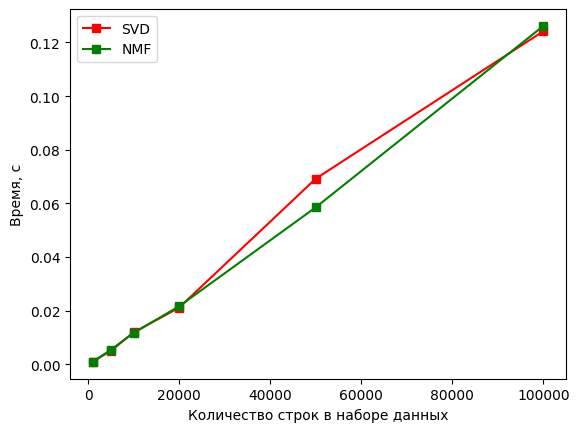

In [32]:
graph1 = []
graph2 = []
inits = []

ns = [1000, 5000, 10000, 20000, 50000, 100000]

for n in ns:
    ratings_df_sample = ratings_df[:n]
    reader = Reader(rating_scale=(1, 10))
    dataset = Dataset.load_from_df(ratings_df_sample[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(dataset, test_size = 0.1)
    
    model_1 = SVD()
    model_2 = NMF()
    
    start_time = time.time()
    model_1.fit(trainset)
    model_2.fit(trainset)
    end_time = time.time()
    e_time = (end_time - start_time)
    inits.append(e_time)
    
    e_time1 = 0
    e_time2 = 0
    
    for i in range(100):
        start_time = time.time()
#         for i in range(0, 100):
        model_1.test(testset)
        end_time = time.time()
        e_time1 += (end_time - start_time)
        
        start_time = time.time()
#         for i in range(0, 100):
        model_1.test(testset)
        end_time = time.time()
        e_time2 += (end_time - start_time)
        
    graph1.append(e_time1 / 100)
    graph2.append(e_time2 / 100)

plt.plot(ns, graph1, marker='s', color='r', label="SVD");
plt.plot(ns, graph2, marker='s', color='g', label="NMF");
plt.legend()
plt.xlabel('Количество строк в наборе данных')
plt.ylabel('Время, с');

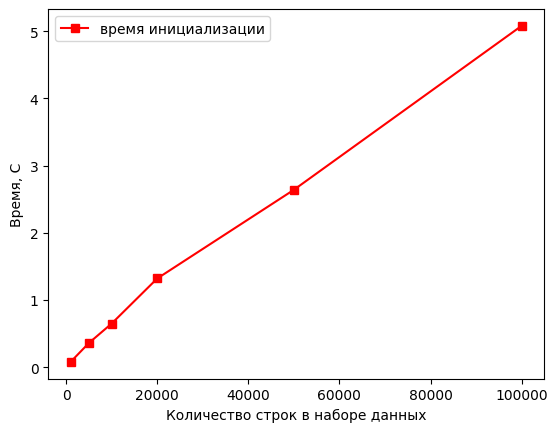

In [33]:
plt.plot(ns, inits, marker='s', color='r', label="время инициализации");
plt.legend()
plt.xlabel('Количество строк в наборе данных')
plt.ylabel('Время, С');